In [ ]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

In [ ]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

In [1]:
# PACKAGE LIST: pip list

import scanpy as sc
import scirpy as ir
import pandas as pd
import muon as mu
import csv
import anndata
import matplotlib.pyplot as plt
import celltypist as celltypist
from celltypist import models

import numpy as np
import seaborn as sns 
from scipy.stats import median_abs_deviation
from cycler import cycler

from matplotlib import cm as mpl_cm

In [2]:
# Read previous mdata
mdata=mu.read_h5mu('msc_mdata2.h5mu')
mdata

C:\Users\gaura\miniconda3\Lib\site-packages\anndata\utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)


MuData object with n_obs × n_vars = 21699 × 25691
  obs:	'sample', 'group', 'batch'
  2 modalities
    gex:	20554 x 25691
      obs:	'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'sample', 'group', 'batch', 'liver', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res1', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'airr:chain_pairing_colors', 'batch_colors', 'celltypist_cell_label_fine_colors', 'dendrogram_celltypist_cell_label_fine', 'group_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_res0_25', 'leiden_res0_25_colors', 'leiden_res0_5', 'leiden_res0_5_colors', 'leiden_res1', 'leiden_res1_colors', 'log1p', 'neighbors', 'pca', 'predicted_doublet_colors', 'sample_colors', 'scrublet', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    airr:	6745 x 0
      obs:	'receptor_type', 'receptor_subtype', 'chain_pairing', 'clone_id', 'clone_id_size', 'cc_aa_tcrdist', 'cc_aa_tcrdist_size'
      uns:	'cc_aa_tcrdist', 'chain_indices', 'clone_id', 'clonotype_network', 'ir_dist_aa_tcrdist', 'ir_dist_nt_identity'
      obsm:	'X_clonotype_network', 'airr', 'chain_indices'

In [3]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

In [6]:
# 3.1 Clonal Expansion

In [34]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

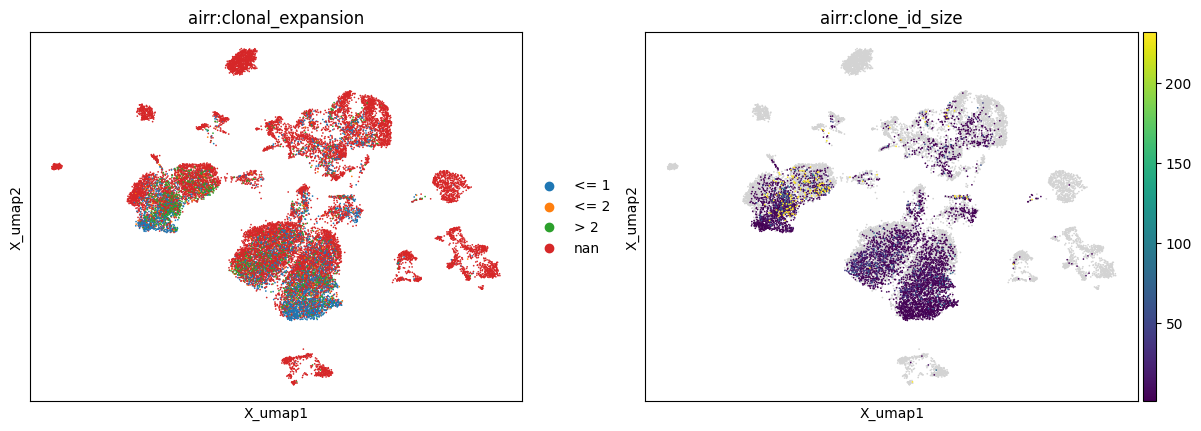

In [11]:
ir.tl.clonal_expansion(mdata)
mu.pl.embedding(mdata, basis="gex:umap", color=["airr:clonal_expansion", "airr:clone_id_size"])

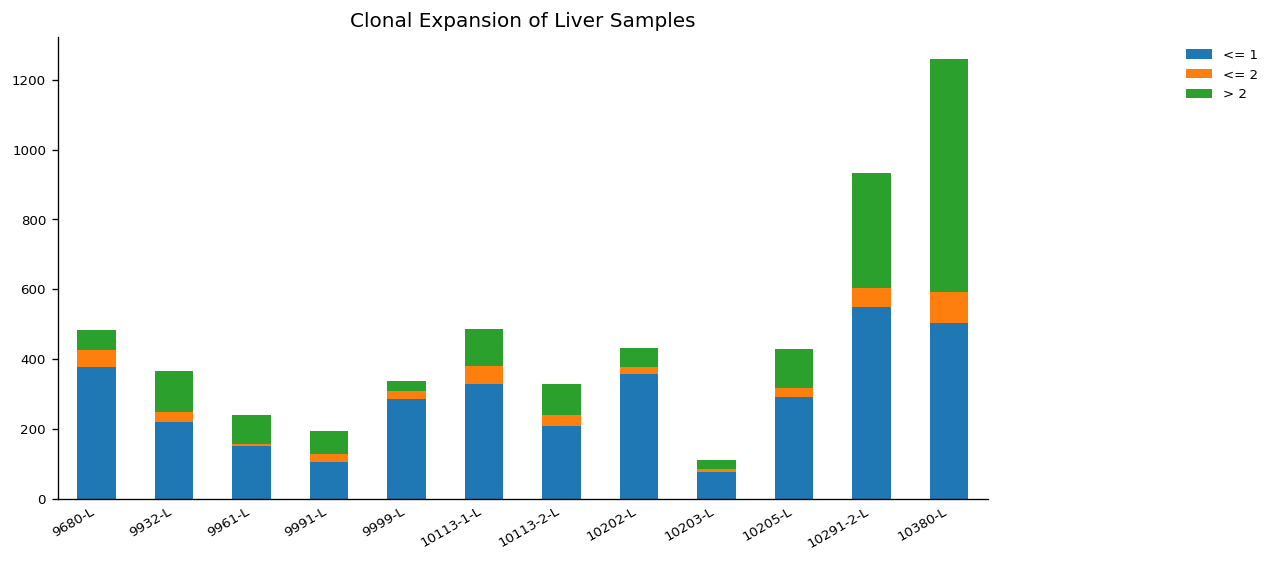

In [12]:
_ = ir.pl.clonal_expansion(mdata, target_col="clone_id", groupby="gex:sample", breakpoints=(1, 2), normalize=False, figsize=(10,5))
plt.title('Clonal Expansion of Liver Samples'
         )
plt.show()

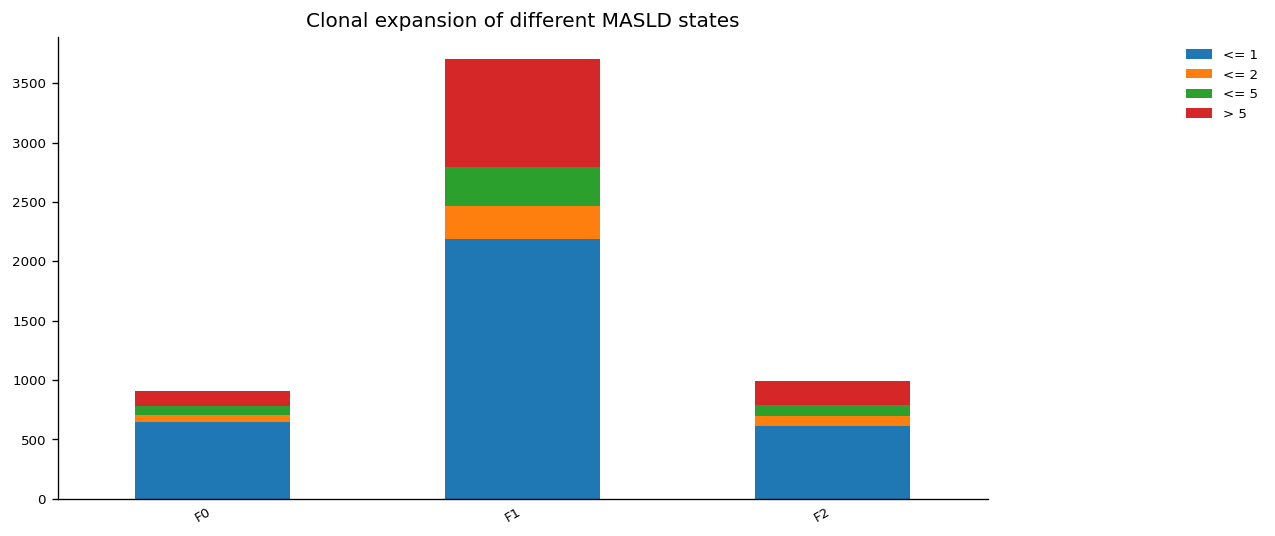

In [13]:
_ = ir.pl.clonal_expansion(mdata, target_col="clone_id", groupby="gex:group", breakpoints=(1, 2, 5), normalize=False, figsize=(10,5))
plt.title('Clonal expansion of different MASLD states')
plt.show()

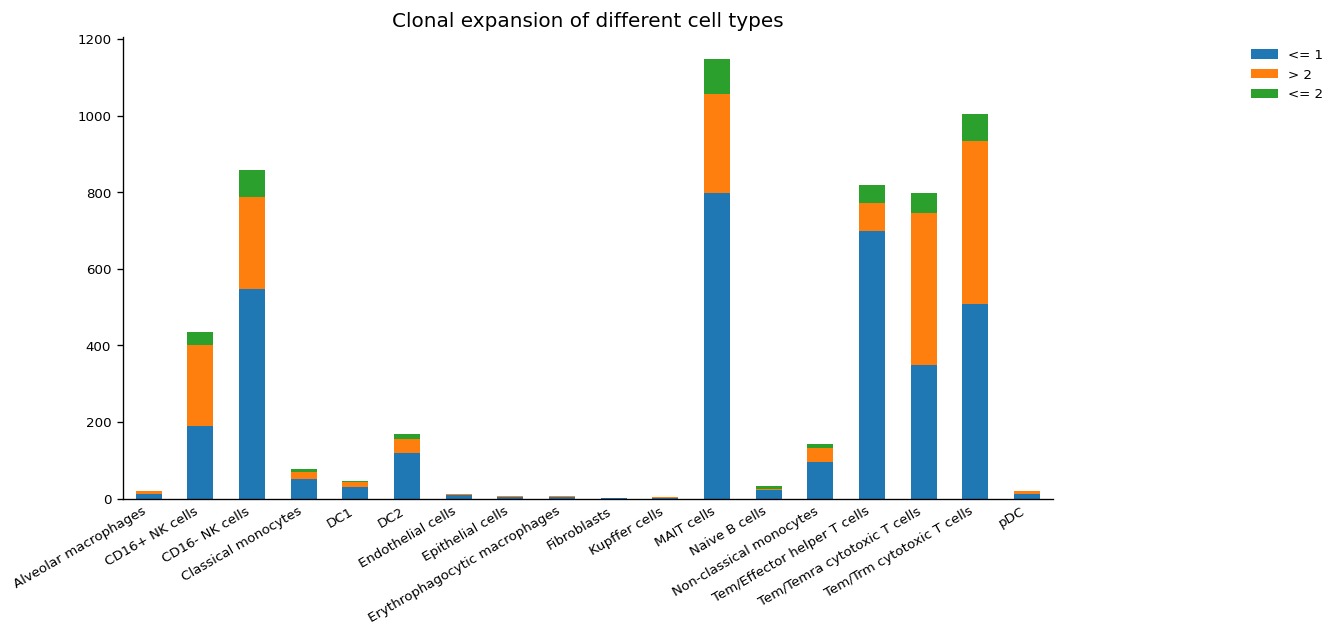

In [14]:
_ = ir.pl.clonal_expansion(mdata, target_col="clone_id", groupby="gex:celltypist_cell_label_fine", breakpoints=(1,2), normalize=False, figsize=(10,5))
plt.title('Clonal expansion of different cell types')
plt.show()

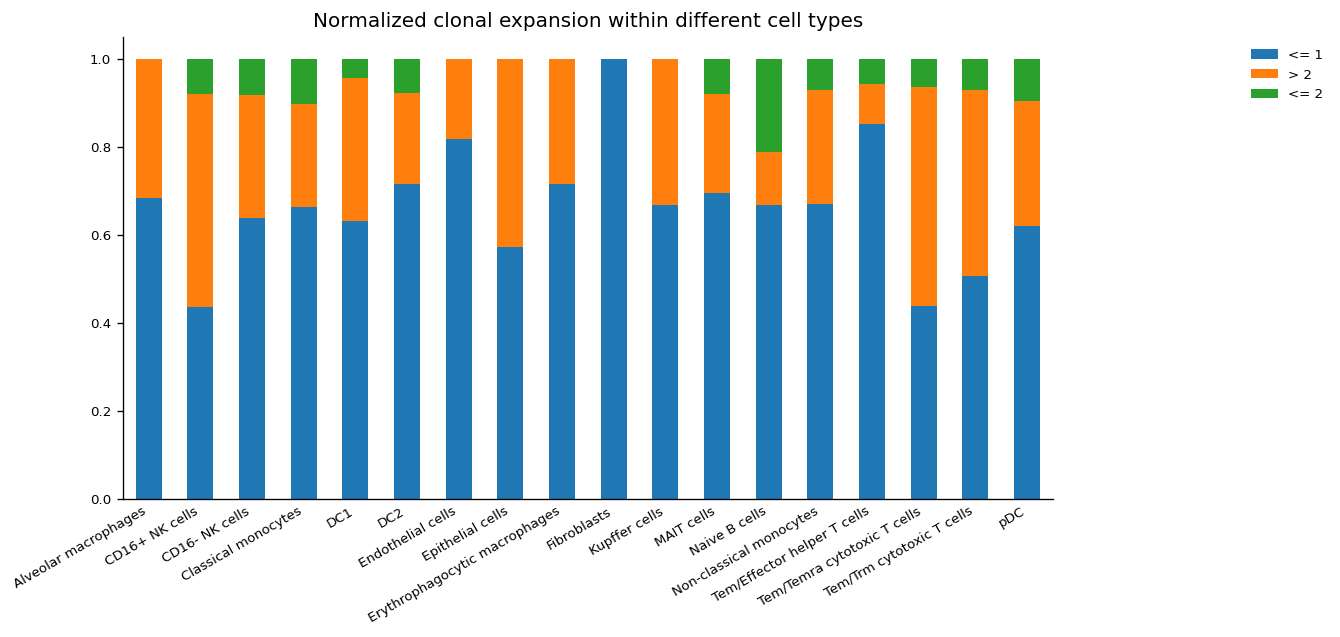

In [15]:
_ = ir.pl.clonal_expansion(mdata, target_col="clone_id", groupby="gex:celltypist_cell_label_fine", breakpoints=(1,2), normalize=True, figsize=(10,5))
plt.title('Normalized clonal expansion within different cell types')
plt.show()

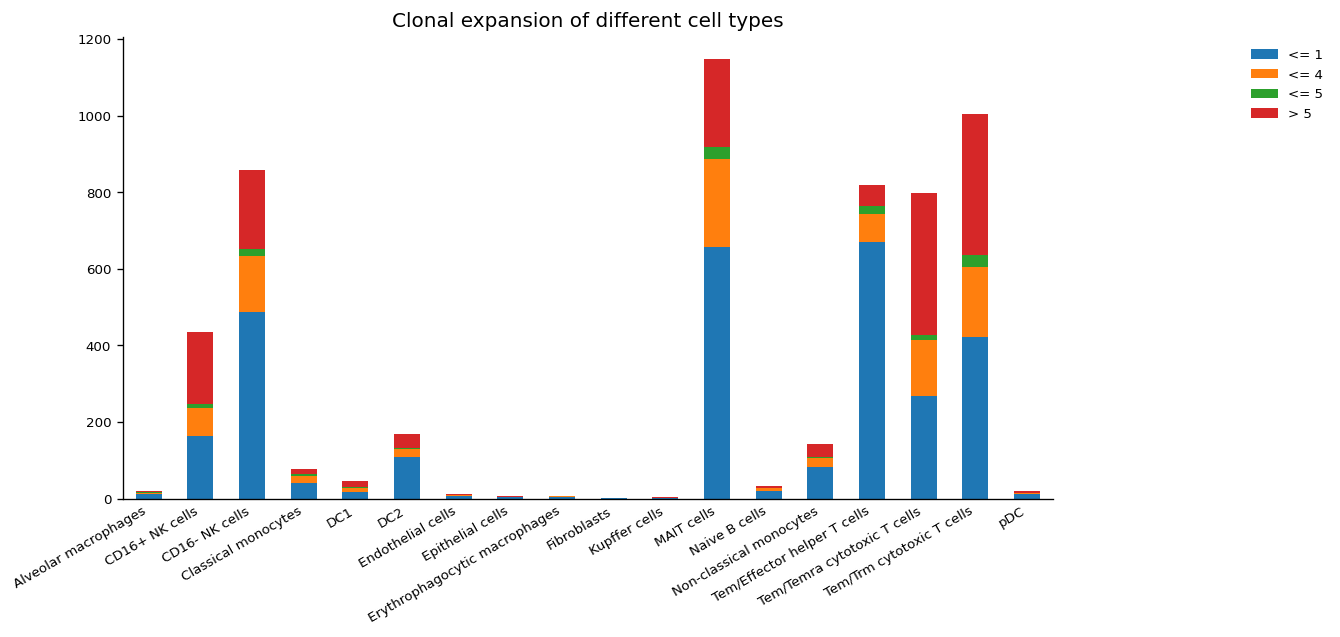

In [16]:
_ = ir.pl.clonal_expansion(mdata, target_col="cc_aa_tcrdist", groupby="gex:celltypist_cell_label_fine", breakpoints=(1, 4, 5), normalize=False, figsize=(10,5))
plt.title('Clonal expansion of different cell types')
plt.show()

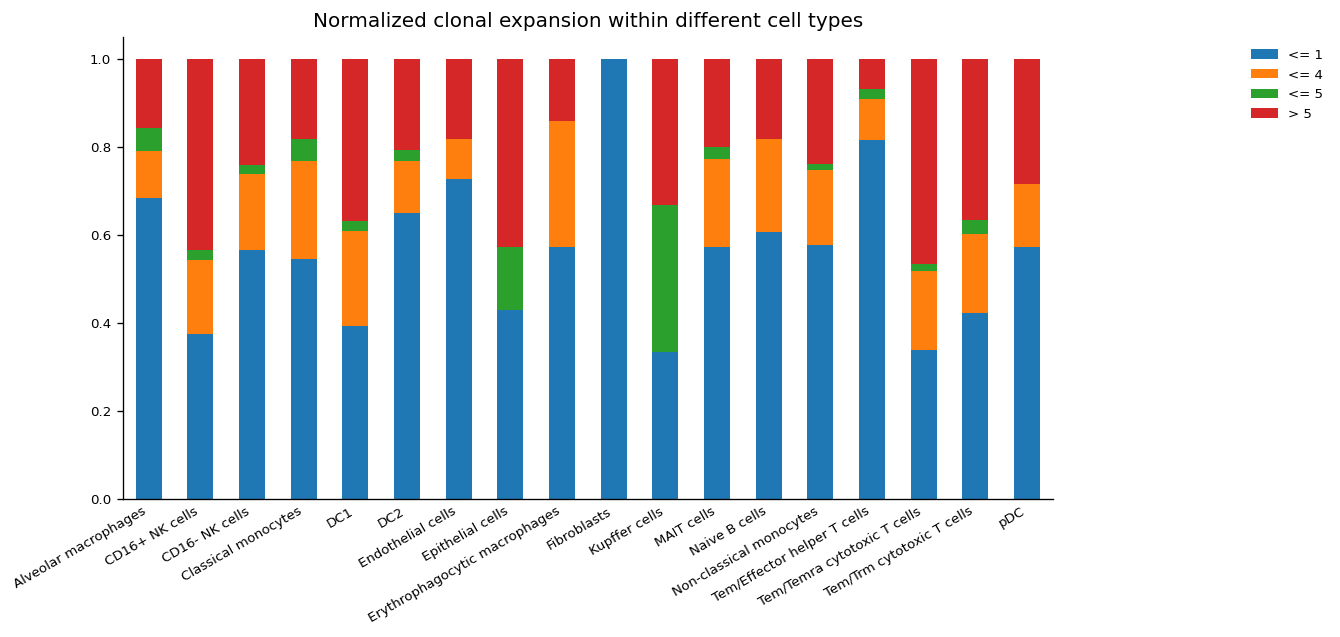

In [17]:
_ = ir.pl.clonal_expansion(mdata, target_col="cc_aa_tcrdist", groupby="gex:celltypist_cell_label_fine", breakpoints=(1,4, 5), normalize=True, figsize=(10,5))
plt.title('Normalized clonal expansion within different cell types')
plt.show()

In [38]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

In [36]:
# 3.2 Clonal Expansion-Diversity

In [37]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

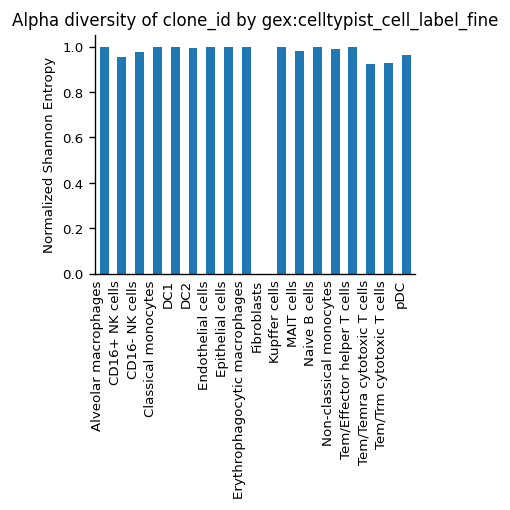

In [19]:
_ = ir.pl.alpha_diversity(mdata, metric="normalized_shannon_entropy", groupby="gex:celltypist_cell_label_fine")
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '10113-1-L'),
  Text(1, 0, '10113-2-L'),
  Text(2, 0, '10202-L'),
  Text(3, 0, '10203-L'),
  Text(4, 0, '10205-L'),
  Text(5, 0, '10291-2-L'),
  Text(6, 0, '10380-L'),
  Text(7, 0, '9680-L'),
  Text(8, 0, '9932-L'),
  Text(9, 0, '9961-L'),
  Text(10, 0, '9991-L'),
  Text(11, 0, '9999-L')])

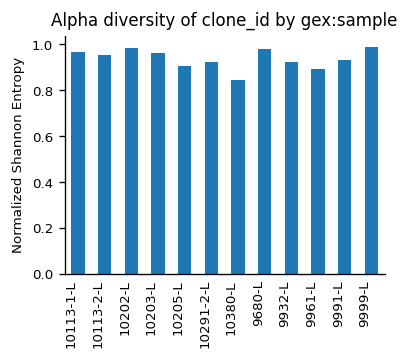

In [21]:
_ = ir.pl.alpha_diversity(mdata, metric="normalized_shannon_entropy", groupby="gex:sample")
plt.xticks(rotation=90)

In [23]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

In [ ]:
# 3.3 Clonotype Abundance

In [ ]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

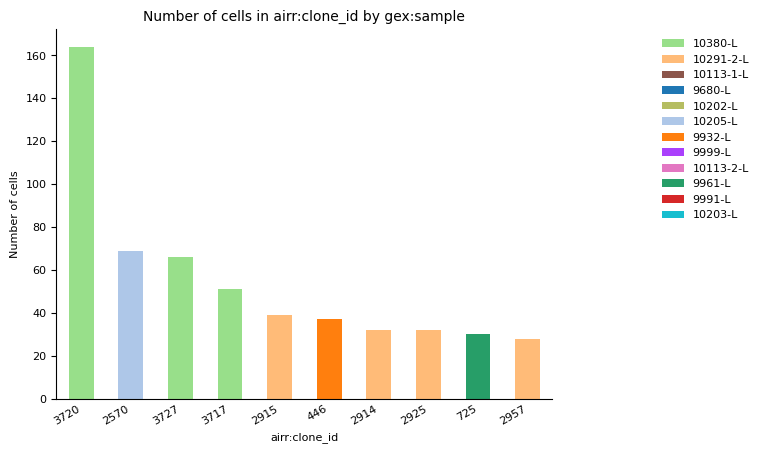

In [25]:
# Clone_ID=CDR3 sequence
_ = ir.pl.group_abundance(mdata, groupby="airr:clone_id", target_col="gex:sample", max_cols=10,    fig_kws={"dpi": 100},)

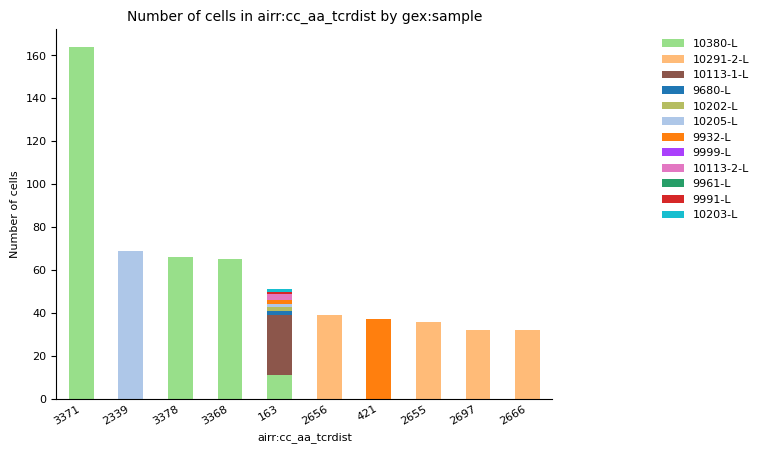

In [26]:
# cc_aa_tcrdist=Amino acid sequence (clonotype cluster)
_ = ir.pl.group_abundance(
    mdata,
    groupby="airr:cc_aa_tcrdist",
    target_col="gex:sample",
    max_cols=10,
    fig_kws={"dpi": 100},
    #normalize=True,
)


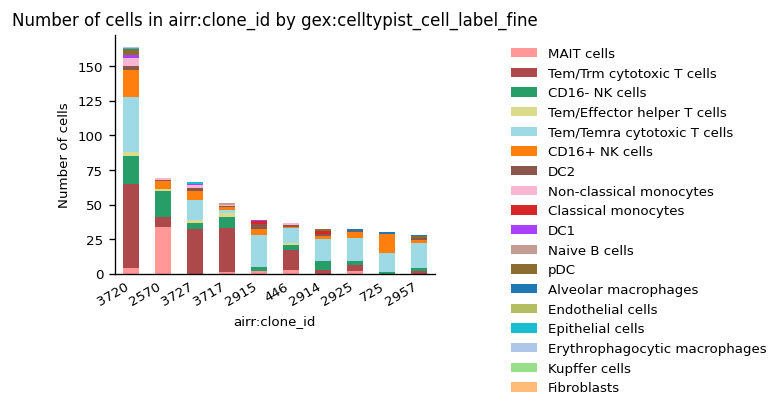

In [27]:
_ = ir.pl.group_abundance(mdata, groupby="airr:clone_id", target_col="gex:celltypist_cell_label_fine", max_cols=10)

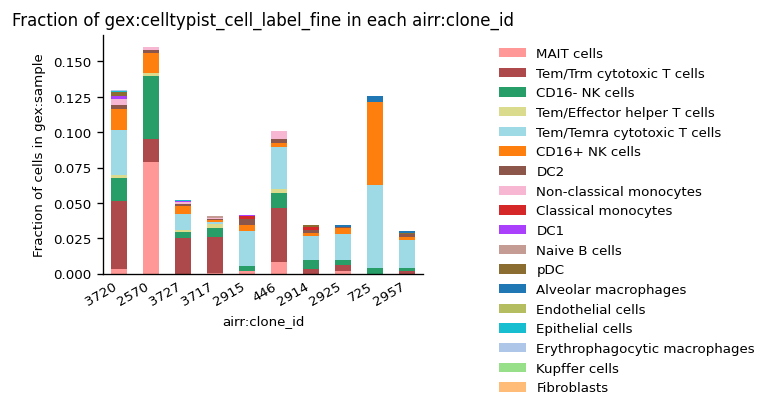

In [28]:
_ = ir.pl.group_abundance(
    mdata,
    groupby="airr:clone_id",
    target_col="gex:celltypist_cell_label_fine",
    max_cols=10,
    normalize="gex:sample",
)

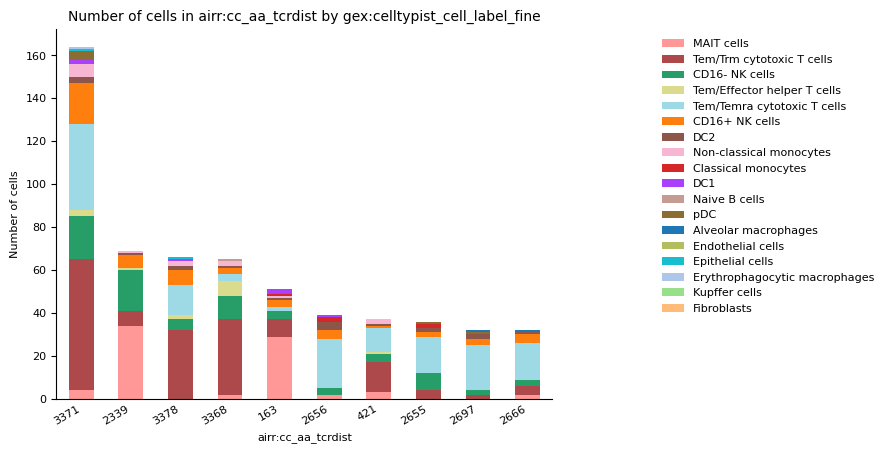

In [29]:
_ = ir.pl.group_abundance(
    mdata,
    groupby="airr:cc_aa_tcrdist",
    target_col="gex:celltypist_cell_label_fine",
    max_cols=10,
    fig_kws={"dpi": 100},
    #normalize=True,
)


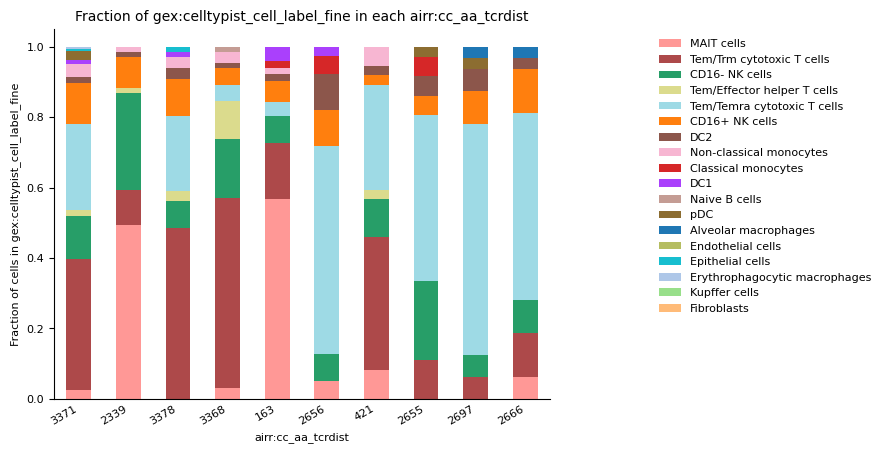

In [30]:
_ = ir.pl.group_abundance(
    mdata,
    groupby="airr:cc_aa_tcrdist",
    target_col="gex:celltypist_cell_label_fine",
    max_cols=10,
    fig_kws={"dpi": 100},
    normalize=True,
)


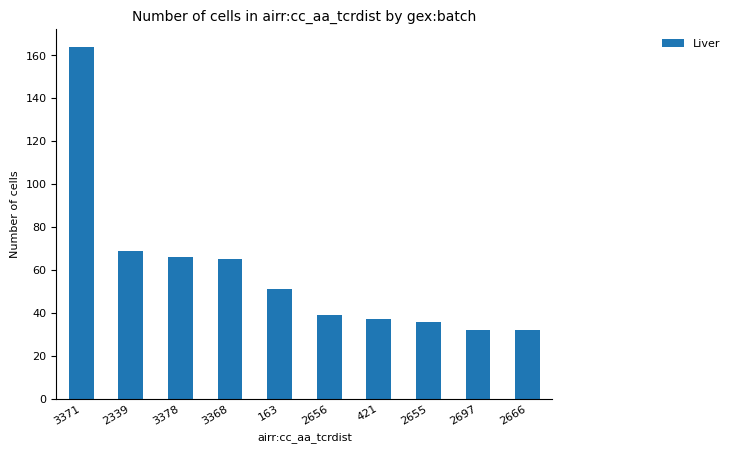

In [31]:
_ = ir.pl.group_abundance(
    mdata,
    groupby="airr:cc_aa_tcrdist",
    target_col="gex:batch", #can look at sample/group/batch
    max_cols=10,
    fig_kws={"dpi": 100},
    #normalize=True,
)

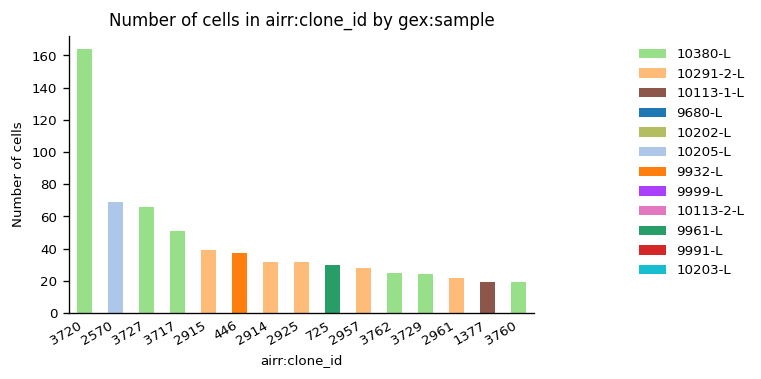

In [32]:
_ = ir.pl.group_abundance(
    mdata,
    groupby="airr:clone_id",
    target_col="gex:sample",
    max_cols=15,
    figsize=(5, 3),
)

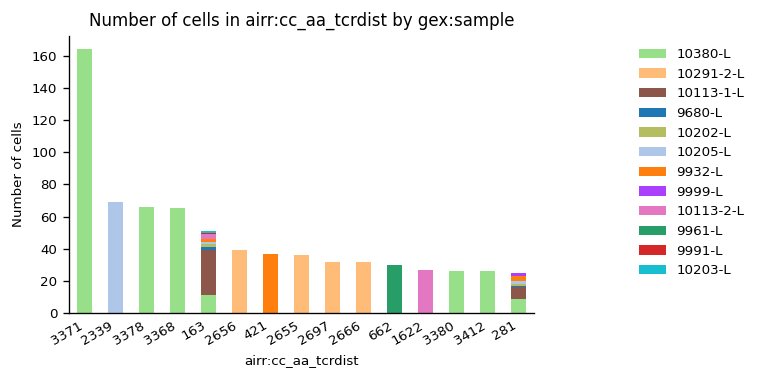

In [33]:
_ = ir.pl.group_abundance(
    mdata,
    groupby="airr:cc_aa_tcrdist",
    target_col="gex:sample",
    max_cols=15,
    figsize=(5, 3),
)

In [ ]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

In [ ]:
# 3.4 Gene usage

In [ ]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

... storing 'VJ_1_v_call' as categorical
... storing 'VDJ_1_v_call' as categorical
... storing 'VJ_2_v_call' as categorical
... storing 'VDJ_2_v_call' as categorical


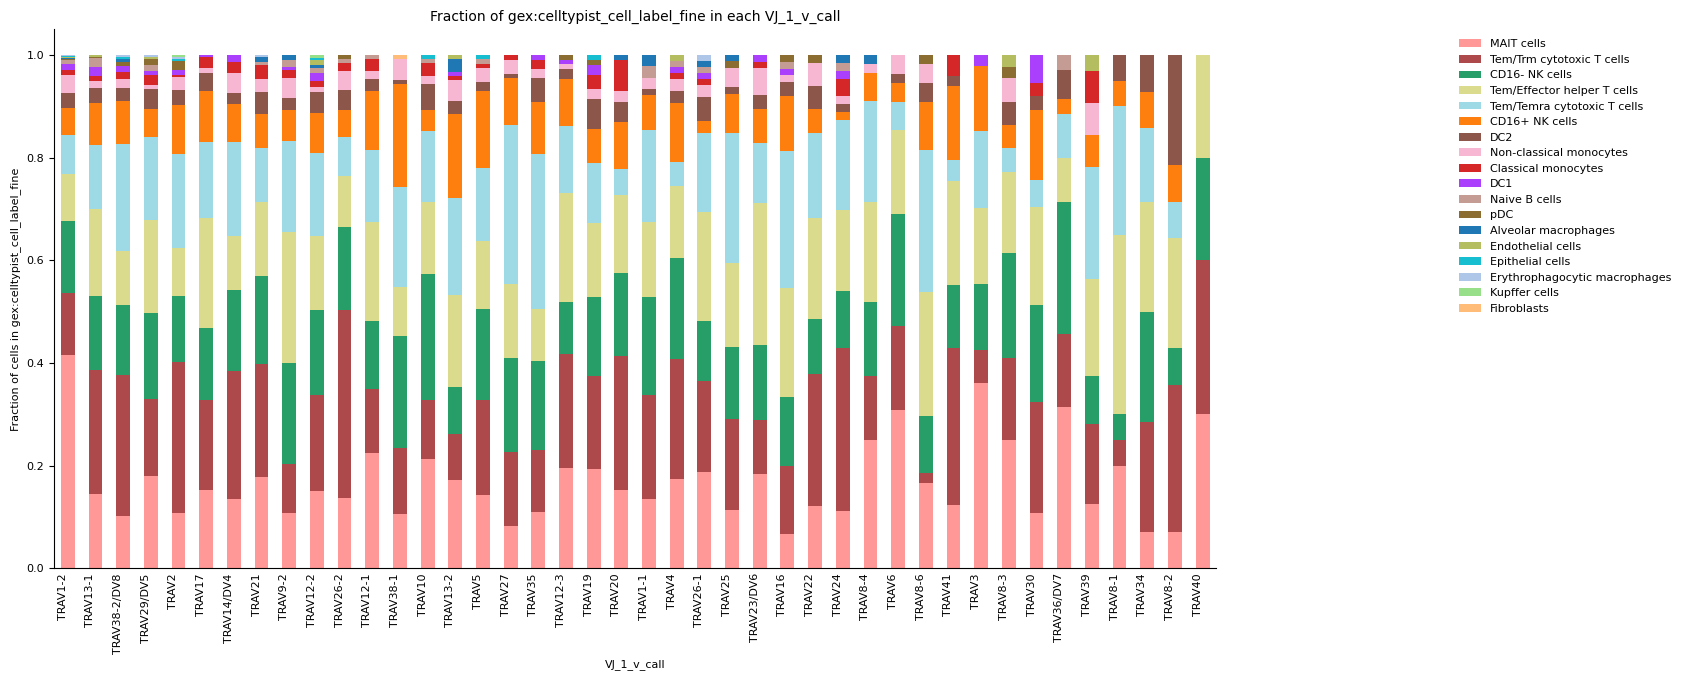

In [40]:
with ir.get.airr_context(mdata, "v_call"):
    ir.pl.group_abundance(
        mdata,
        groupby="VJ_1_v_call",
        target_col="gex:celltypist_cell_label_fine",
        normalize=True,
        fig_kws={"dpi": 100},
        figsize=(15,7)
        #max_cols=10,
    )
    plt.xticks(rotation=90)
    plt.show()

... storing 'VJ_1_v_call' as categorical
... storing 'VDJ_1_v_call' as categorical
... storing 'VJ_2_v_call' as categorical
... storing 'VDJ_2_v_call' as categorical


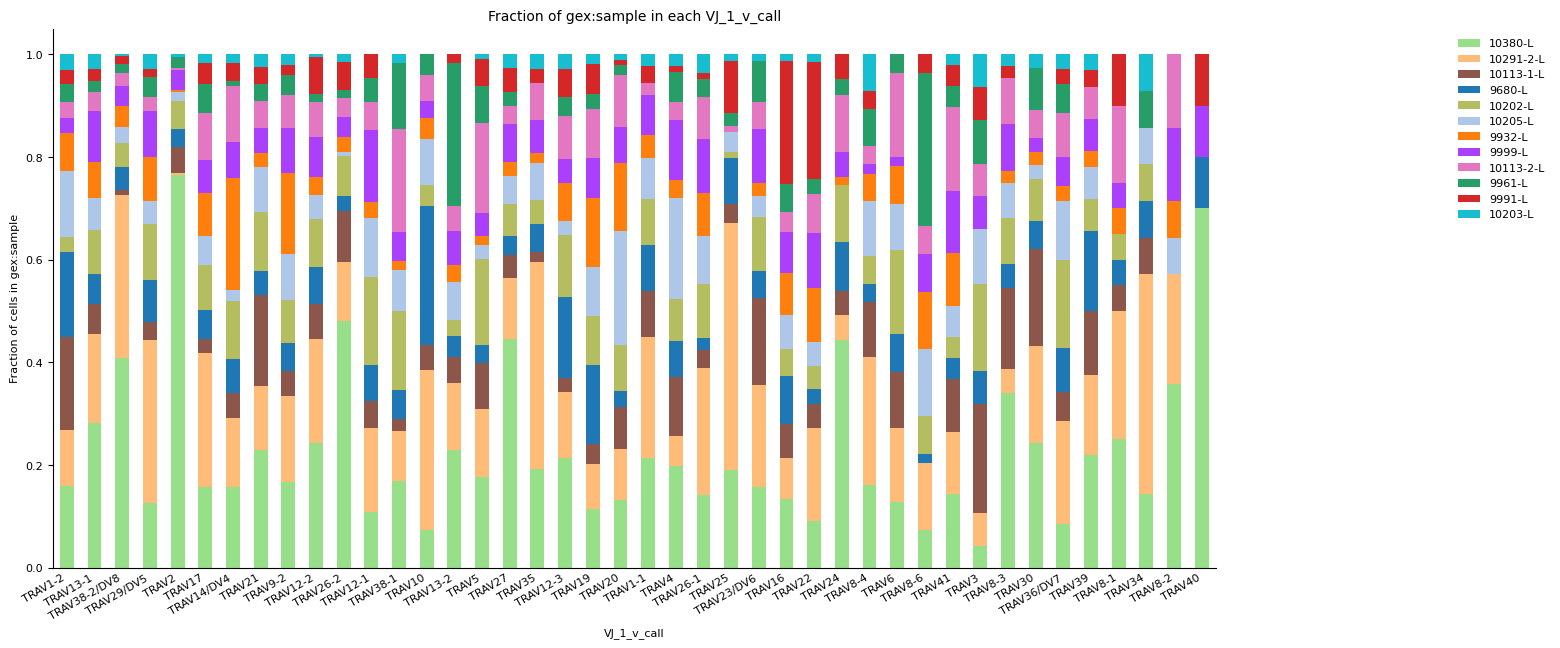

In [41]:
with ir.get.airr_context(mdata, "v_call"):
    ir.pl.group_abundance(
        mdata,
        groupby="VJ_1_v_call",
        target_col="gex:sample",
        normalize=True,
        fig_kws={"dpi": 100},
        figsize=(15,7)
        #max_cols=10,
    )

... storing 'VJ_1_v_call' as categorical
... storing 'VDJ_1_v_call' as categorical
... storing 'VJ_2_v_call' as categorical
... storing 'VDJ_2_v_call' as categorical


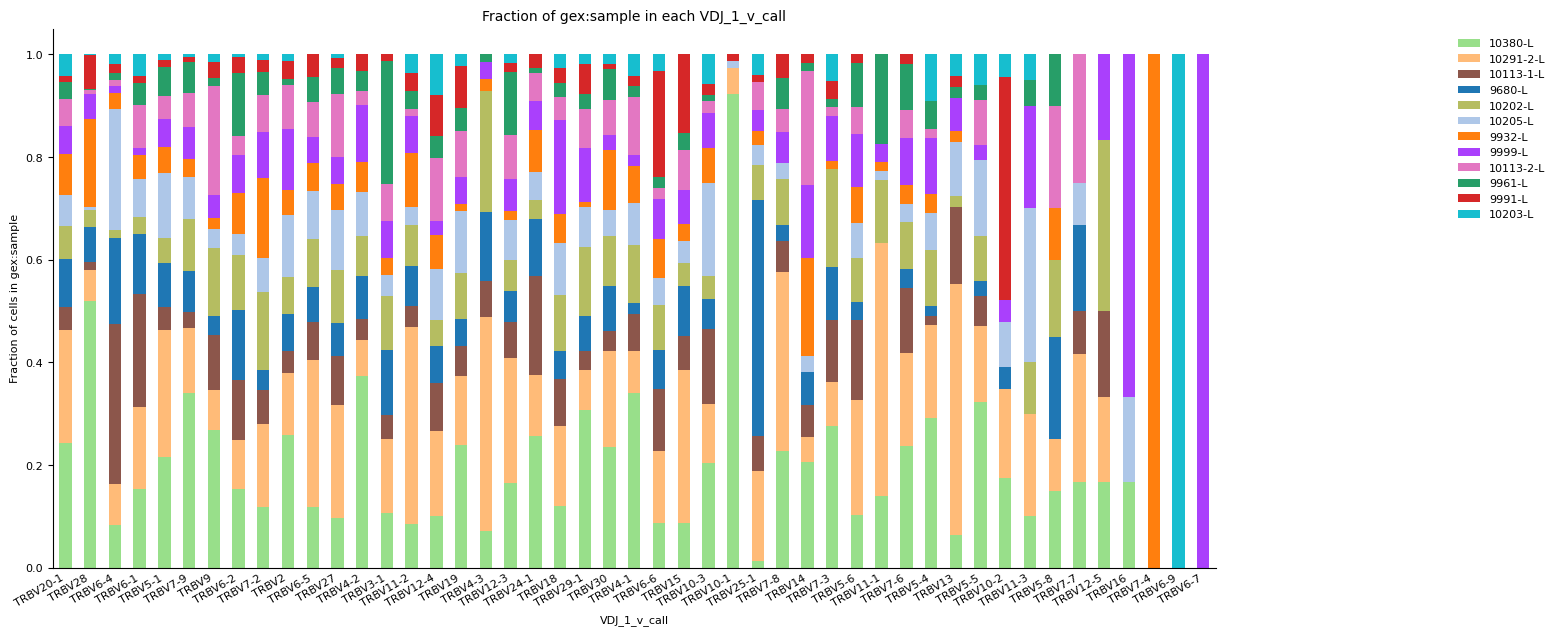

In [42]:
with ir.get.airr_context(mdata, "v_call"):
    ir.pl.group_abundance(
        mdata,
        groupby="VDJ_1_v_call",
        target_col="gex:sample",
        normalize=True,
        fig_kws={"dpi": 100},
        figsize=(15,7)
        #max_cols=10,
    )

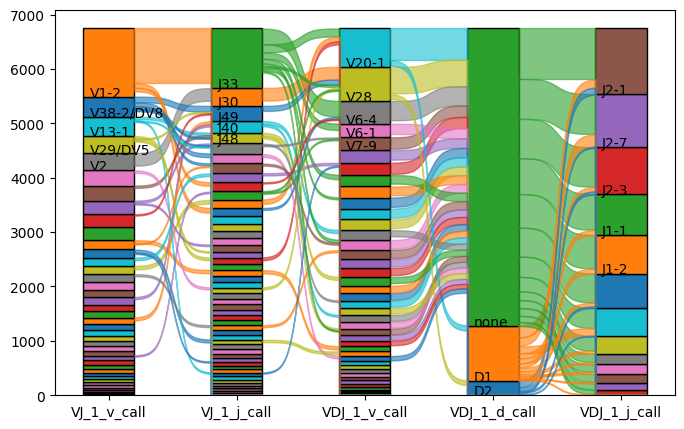

In [43]:
_ = ir.pl.vdj_usage(
    mdata,
    full_combination=False,
    max_segments=None,
    max_ribbons=30,
    fig_kws={"figsize": (8, 5)},
)

In [ ]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

In [45]:
# 3.5 Spectratype plots

In [ ]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

<Axes: title={'center': 'Spectratype of junction_aa by gex:celltypist_cell_label_fine'}, xlabel='junction_aa length', ylabel='Number of cells'>

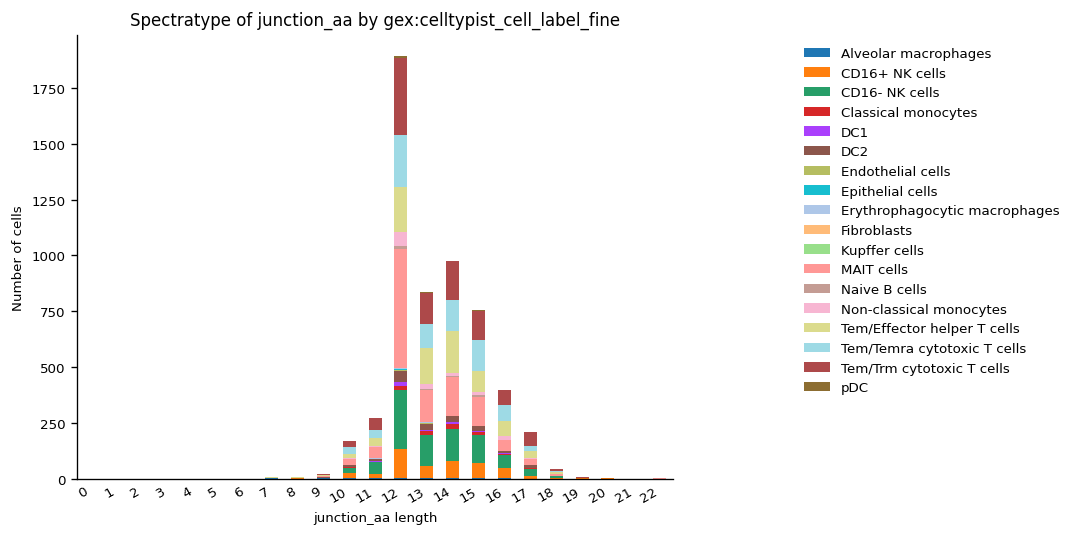

In [46]:
ir.pl.spectratype(mdata, color="gex:celltypist_cell_label_fine", viztype="bar", fig_kws={"dpi": 120})

<Axes: title={'center': 'Spectratype of junction_aa by gex:celltypist_cell_label_fine'}, xlabel='junction_aa length'>

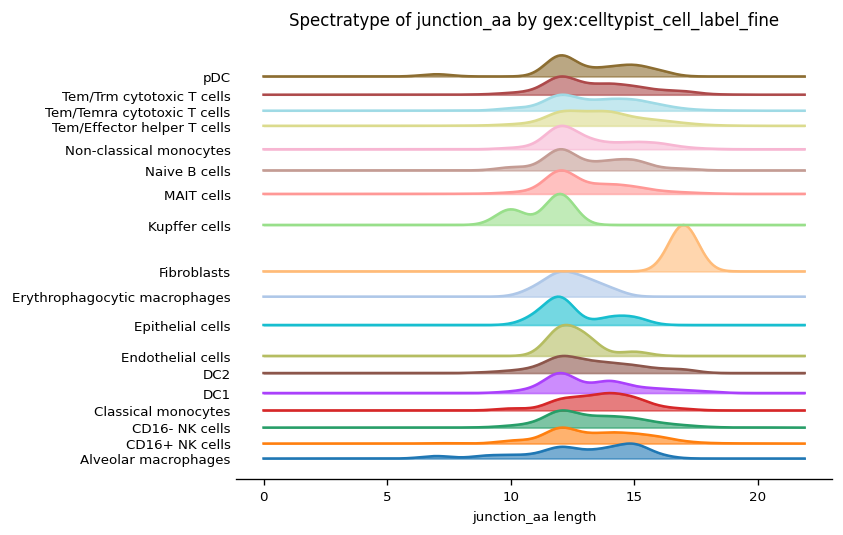

In [47]:
ir.pl.spectratype(
    mdata,
    color="gex:celltypist_cell_label_fine",
    viztype="curve",
    curve_layout="shifted",
    fig_kws={"dpi": 120},
    kde_kws={"kde_norm": False},
)

In [ ]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

In [ ]:
# 3.6 Clonotype modularity

In [ ]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

  0%|          | 0/3568 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

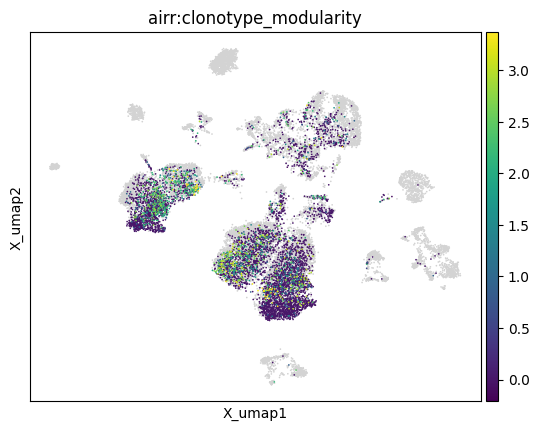

In [48]:
ir.tl.clonotype_modularity(mdata, target_col="airr:cc_aa_tcrdist")
mu.pl.embedding(mdata, basis="gex:umap", color="airr:clonotype_modularity")

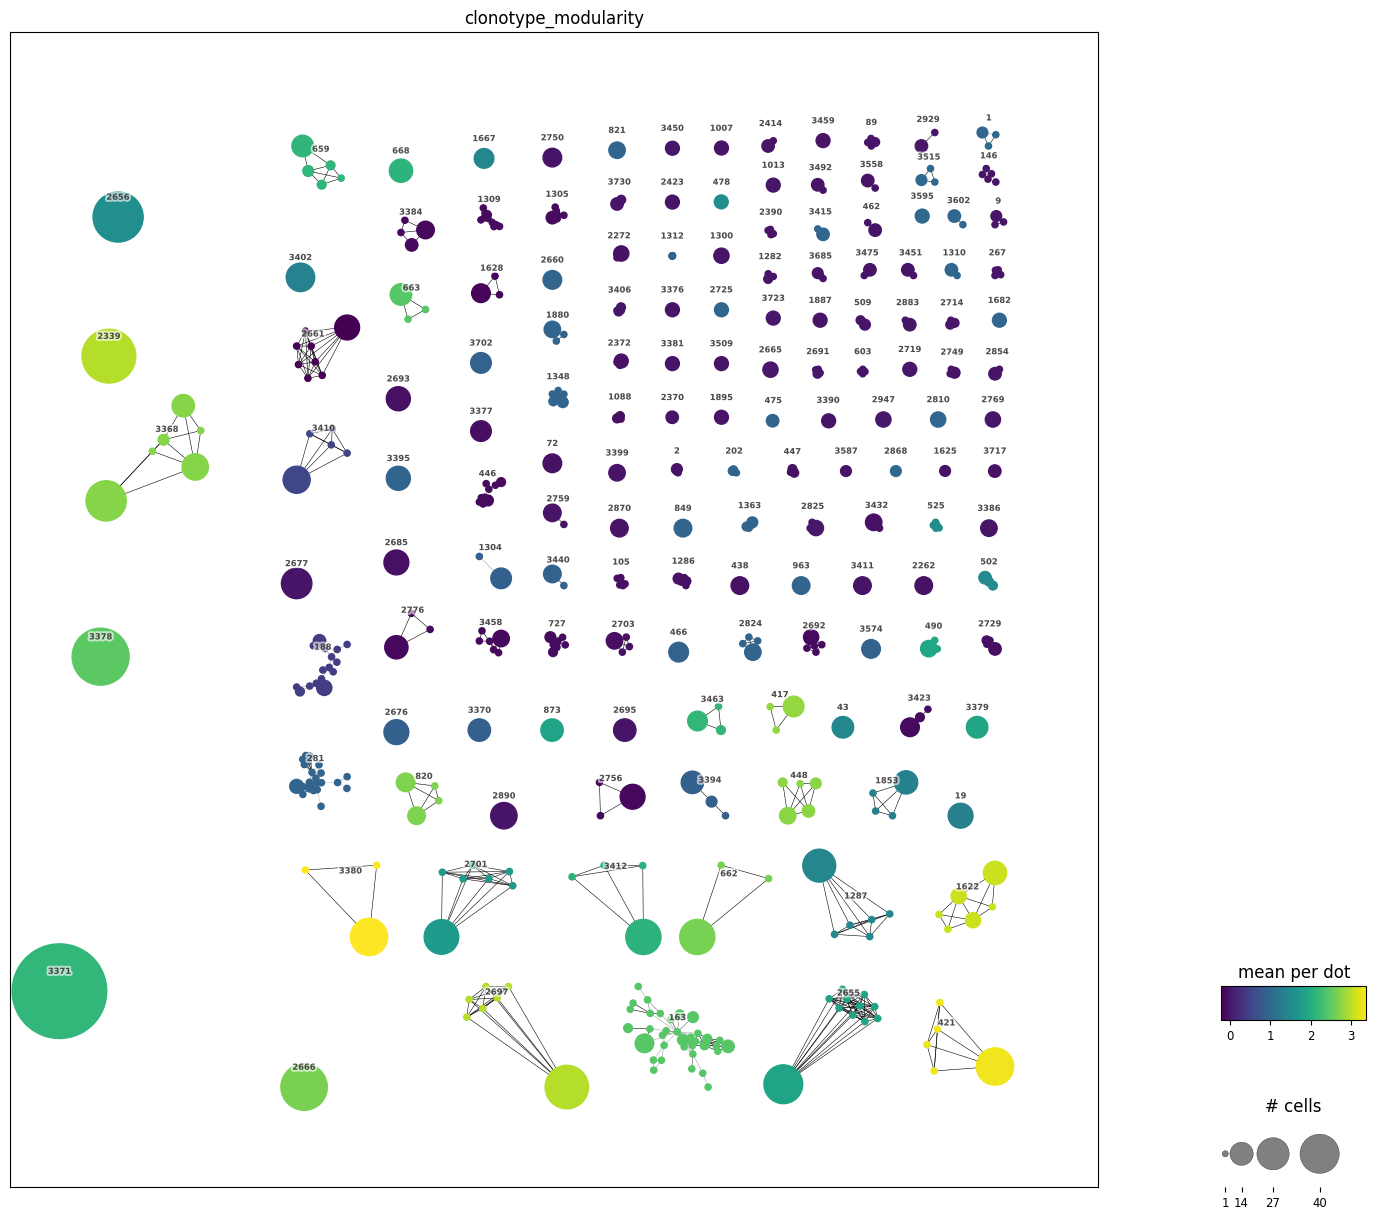

In [49]:
_ = ir.pl.clonotype_network(
    mdata,
    color="clonotype_modularity",
    label_fontsize=6,
    panel_size=(15, 15),
    base_size=20,
    fig_kws={"dpi": 100},
)

<Axes: xlabel='modularity score', ylabel='-log10(FDR)'>

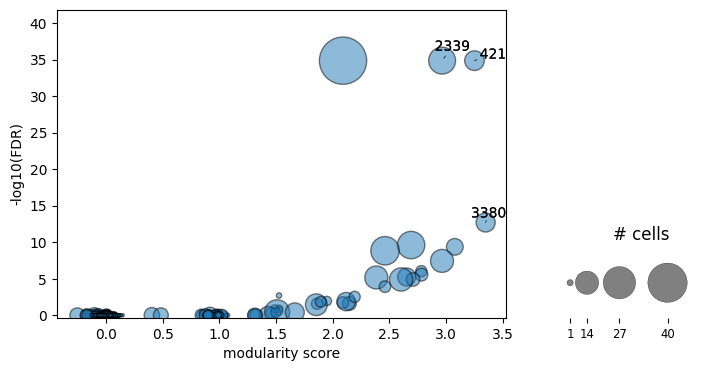

In [50]:
ir.pl.clonotype_modularity(mdata, base_size=20)

In [51]:
clonotypes_top_modularity = list(
    mdata.obs.set_index("airr:cc_aa_tcrdist")["airr:clonotype_modularity"]
    .sort_values(ascending=False)
    .index.unique()
    .values[:2]
)
clonotypes_top_modularity

['3380', '421']

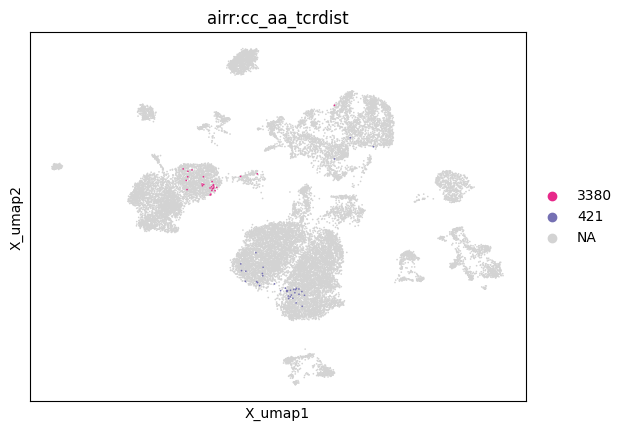

In [52]:
test_ad = mu.pl.embedding(
    mdata,
    basis="gex:umap",
    color="airr:cc_aa_tcrdist",
    groups=clonotypes_top_modularity,
    palette=cycler(color=mpl_cm.Dark2_r.colors),
   # panel_size=(20, 20),
)

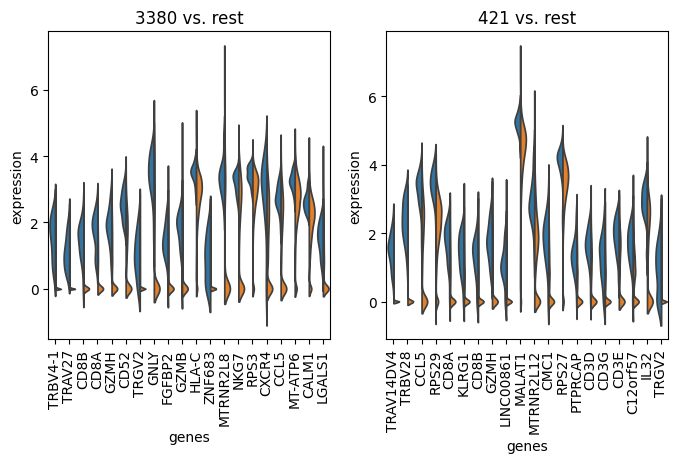

In [53]:
with ir.get.obs_context(mdata["gex"], {"cc_aa_tcrdist": mdata.obs["airr:cc_aa_tcrdist"]}) as tmp_ad:
    sc.tl.rank_genes_groups(
        tmp_ad,
        "cc_aa_tcrdist",
        groups=clonotypes_top_modularity, #clonotypes_top_modularity
        reference="rest",
        method="wilcoxon",
    )
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    for ct, ax in zip(clonotypes_top_modularity, axs): #clonotypes_top_modularity
        sc.pl.rank_genes_groups_violin(tmp_ad, groups=[ct], n_genes=20, ax=ax, show=False, strip=False)
#BECAREFUL
#THIS GENE EXPRESSION CAN BE DIFFERENT BECAUSE THERE ARE DIFFERENT CELL TYPES IN GENERAL IN THESE CLONOTYPES

In [55]:
mdata.write('msc_mdata3.h5mu')